# How did giving birth during the Covid-19 pandemic impact mental health? 
### Exploratory Data Analysis & Visualisation project

In this exploratory data study, I wanted to find out whether giving birth during the Covid-19 pandemic had a detrimental impact on postnatal mental health, and what conditions made someone particularly vulnerable to developing postnatal depression during this time. The dataset included maternal mental health scores delivery date, measures for the health of the baby at birth and the delivery experience, and personal circumstances of the *mother*, such as household income and education level. The data was collected from people living in Canada, an affluent country with an accessible, functioning healthcare system. 

Postnatal depression is a serious condition, which greatly impacts the health of the mother/parent, child and family. It is also a very common condition. Prior to the Covid-19 pandemic, about 1 in 10 *women/afab people* developed it after giving birth. It is reasonable to predict that people who were pregnant and gave birth during the pandemic were particularly vulnerable to developing mental health problems, in this time of public health crisis, social isolation, economic instability and general uncertainty about the future.  

The purpose of this project was to discover whether an external stressor, such as a global pandemic, worsens the mental health of people who give birth during this time, and whether individual circumstances make some people more vulnerable to this than others. My hope is that better understanding of the causes and contributors of postnatal depression can inform as to who is at risk and what support is needed, should another pandemic or largescale disaster occur in the future.

* The data used for this exploration is a subset from a larger study that is still ongoing. The data was published here: https://osf.io/ha5dp/

* The protocol for the data collection was published here: https://www.researchprotocols.org/2021/4/e25407/

---

## Dataset breakdown

* Data was collected from individuals who were pregnant during the Covid-19 pandemic. Participants were ≥17 years old, and ≤ 35 weeks gestation at study enrollment.
* The dataset doesn't include how long after delivery the survery was completed. Surveys were sent at 3, 6 and 12 months after birth, therefore, I expect that the data here is collected from the same timepoint post-birth.

### Mental health variables:

**1) Edinburgh Postnatal Depression Scale**
* Widely used questionnaire for identifying the symptoms of postnatal depression
* The possible scores range from 0 to 30, with ≥13 used to identify people with the condition

**2) PROMIS (Patient-Reported Outcomes Measurement Information System) Anxiety**
* Standardarized, seven-item questionnaire for participants to report their general anxiety symptoms experienced in the past week

**3) Perceived Covid-19 threat**
* Participants gave a score from 0 to 100 for the following three questions:
* *How much do (did) you think your life is (was) in danger during the Covid-19 pandemic?* 
* *How much do (did) you think your baby's life is (was) in danger during the Covid-19 pandemic?* 
* *How much are you worried that exposure to the Covid-19 virus will harm your baby?*

### Newborn health and delivery variables:

**1) Gestational Age At Birth (weeks), Birth Length (cm) and Birth Weight (kg)**
* Measures for whether the babies were born premature or full-term, and for the size of the babies at birth

**2) Delivery Mode**
* Whether the deliveries were vaginally or via C-section

**3) NICU (Neonatal Intensive Care Unit) Stay**
* Whether the babies were admitted to NICU or not 

**4) Delivery Date**
* Month and Year of birth

### Personal circumstance variables:
**1) Maternal Age**

**2) Household Income**

**3) Maternal Education**

---



## 1) Data handling and cleaning

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, f_oneway, pearsonr

# Importing the functions
from psd_covid_functions import *

In [2]:
# Importing the dataset
df = pd.read_csv('data.csv')
df.head()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OSF_ID                                      10772 non-null  int64  
 1   Maternal_Age                                10661 non-null  float64
 2   Household_Income                            10521 non-null  object 
 3   Maternal_Education                          10595 non-null  object 
 4   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 5   PROMIS_Anxiety                              9566 non-null   float64
 6   Gestational_Age_At_Birth                    6734 non-null   float64
 7   Delivery_Date(converted to month and year)  6733 non-null   object 
 8   Birth_Length                                5480 non-null   float64
 9   Birth_Weight                                6078 non-null   float64
 10  Delivery_M

In [4]:
# Replacing blank values with NaN
df = df.replace(' ', np.nan)

# Converting the numerical data in the last three columns into floats instead of objects
df['Threaten_Life'] = df['Threaten_Life'].astype(float)
df['Threaten_Baby_Danger'] = df['Threaten_Baby_Danger'].astype(float)
df['Threaten_Baby_Harm'] = df['Threaten_Baby_Harm'].astype(float)


# Renaming...
# Removing the _ from the column names, so it's easier to read
df.columns = df.columns.str.replace('_', ' ')

# Renaming the delivery date column and converting it to datetime
df.rename(columns={'Delivery Date(converted to month and year)': 'Delivery Date'}, inplace=True)
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format='%b%Y')
df['Delivery Date'] = df['Delivery Date'].dt.to_period('M')

# Converying birth weight into kilograms and adding units
df['Birth Weight'] = df['Birth Weight'] / 1000
df.rename(columns={'Gestational Age At Birth': 'Gestational Age At Birth (weeks)',
                   'Birth Length': 'Birth Length (cm)',
                   'Birth Weight': 'Birth Weight (kg)'
                   }, inplace=True)

# Renaming 'Caesarean-section (c-section)' to 'C-section'
df['Delivery Mode'] = df['Delivery Mode'].replace('Caesarean-section (c-section)', 'C-section')

# Line break in 'Less than high school diploma'
df['Maternal Education'] = df['Maternal Education'].replace('Less than high school diploma', 'Less than high \nschool diploma')

# Renaming NICU Stay options
df['NICU Stay'] = df['NICU Stay'].replace('No', 'Without NICU stay')
df['NICU Stay'] = df['NICU Stay'].replace('Yes', 'With NICU stay')

In [5]:
# Checking for duplicates
df.duplicated().sum()

0

In [6]:
# Dropping OSF ID column, as it's not needed
df.drop(columns=['OSF ID'], inplace=True)

# Reordering the columns so the delivery date is first, then the continuous variables and the categorical variables
date_col = ['Delivery Date']
cont_cols = ['Edinburgh Postnatal Depression Scale', 'PROMIS Anxiety', 'Maternal Age', 'Gestational Age At Birth (weeks)', 'Birth Length (cm)', 'Birth Weight (kg)', 'Threaten Life', 'Threaten Baby Danger', 'Threaten Baby Harm']
cat_cols = [col for col in df.columns if col not in cont_cols + date_col]
df = df[date_col + cont_cols + cat_cols]

df.head()

,Delivery Date,Edinburgh Postnatal Depression Scale,PROMIS Anxiety,Maternal Age,Gestational Age At Birth (weeks),Birth Length (cm),Birth Weight (kg),Threaten Life,Threaten Baby Danger,Threaten Baby Harm,Household Income,Maternal Education,Delivery Mode,NICU Stay,Language
0,2020-12,9.0,13.0,38.3,39.71,49.20,3.431,2.0,3.0,27.0,"$200,000+",Masters degree,Vaginally,Without NICU stay,English
1,NaT,4.0,17.0,34.6,NaN,NaN,NaN,2.0,33.0,92.0,"$200,000+",Undergraduate degree,NaN,NaN,English
2,NaT,NaN,NaN,34.3,NaN,NaN,NaN,NaN,NaN,NaN,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,French
3,2020-12,9.0,20.0,28.8,38.57,41.00,2.534,53.0,67.0,54.0,"$100,000 -$124,999",Masters degree,Vaginally,Without NICU stay,French
4,2020-10,14.0,20.0,36.5,39.86,53.34,3.714,23.0,32.0,71.0,"$40,000-$69,999",Undergraduate degree,C-section,Without NICU stay,English


---
### Missing Data

This dataset has a lot of missing values. Out of 10772 rows, 5616 rows have missing values and 5487 rows have more than two missing values. 

As so many rows have multiple missing values, I will remove the rows that have any missing values for the analysis. 

Another approach could be to remove the rows with two or more missing values. And then to fill the missing values for the rows with two or fewer missing values with the mode or mean values for those features. 




In [7]:
# Checking for the number rows with missing values, and two or more missing values
missing_values = (df.isnull().sum(axis=1)>0).sum()
two_plus_missing_values = (df.isnull().sum(axis=1) >2).sum()
print(f"Number of rows with missing values: {missing_values}")
print(f"Number of rows with more than 2 missing values: {two_plus_missing_values }")

Number of rows with missing values: 5616
Number of rows with more than 2 missing values: 5487


In [8]:
# Showing which features have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype    
---  ------                                --------------  -----    
 0   Delivery Date                         6733 non-null   period[M]
 1   Edinburgh Postnatal Depression Scale  9598 non-null   float64  
 2   PROMIS Anxiety                        9566 non-null   float64  
 3   Maternal Age                          10661 non-null  float64  
 4   Gestational Age At Birth (weeks)      6734 non-null   float64  
 5   Birth Length (cm)                     5480 non-null   float64  
 6   Birth Weight (kg)                     6078 non-null   float64  
 7   Threaten Life                         9876 non-null   float64  
 8   Threaten Baby Danger                  9868 non-null   float64  
 9   Threaten Baby Harm                    9880 non-null   float64  
 10  Household Income                      10521 non-null  obje

In [9]:
# Dropping rows with missing values
df = df.dropna()
df.shape

(5156, 15)

---
### Trimming the dataset based on Delivery Date

Delivery Date is an important feature, as when an individual gave birth during the pandemic may impact their mental health. The dataset includes responses from people who gave birth from April 2020 to September 2022, however, from December 2021 there were fewer than 10 rows per month. Therefore, I trimmed the dataset to only months with at least 10 rows of data.

In [10]:
# Number of births recorded per month
df['Delivery Date'].value_counts().sort_index()

Delivery Date
2020-04     10
2020-05    189
2020-06    435
2020-07    515
2020-08    537
2020-09    496
2020-10    453
2020-11    347
2020-12    294
2021-01    301
2021-02    242
2021-03    279
2021-04    254
2021-05    215
2021-06    209
2021-07    154
2021-08     96
2021-09     65
2021-10     32
2021-11     10
2021-12      4
2022-01      1
2022-02      1
2022-03      2
2022-05      1
2022-06      4
2022-07      4
2022-08      2
2022-09      4
Freq: M, Name: count, dtype: int64

In [11]:
# Trimming the dataset to only include months with 10 or more births
value_counts = df['Delivery Date'].value_counts()

mask = df['Delivery Date'].isin(value_counts[value_counts >= 10].index)

df = df[mask]

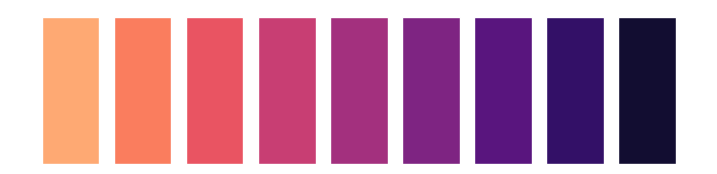

In [12]:
# Choosing the style and color palette for the plots

sns.set_style("whitegrid")

palette = sns.color_palette('magma_r', 10)
palette = palette[1:]
plt.figure(figsize=(len(palette), 2))
for i, color in enumerate(palette):
    plt.bar(i+1, 1, color=color)
plt.axis('off');

sns.set_palette(palette)
two_colors = [palette[2], palette[6]]

---
# 2) Exploratory Data Analysis

## Univariate Statistics

* Mode: most frequently occurring value
* Mean: average value
* Min: smallest value
* 25%: value below which 25% of the data falls (first quartile)
* Median: middle value of the dataset
* 75%: value below which 75% of the data falls (third quartile)
* Max: largest value 
* Standard deviation: the dispersion of data points around the mean
* Skewness: measure of the asymmetry of the distribution of values. Moderate skewness (between -1 and 1) is often tolerated
* Kurtosis: measure of the peakedness or flatness of the distribution of values. Moderate kurtosis (between -2 and 2) is often tolerated
* Outliers (IQR): number of outliers detected based on the interquartile range method
* Outliers (z-score): number of outliers detected based on z-scores, which measures how many standard deviations a data point is from the mean

In [13]:
pd.set_option('display.max_columns', 100)
unistats(df)

,Mode,Mean,Min,25%,Median,75%,Max,Std Dev,Skew,Kurt,Outliers (IQR),Outliers (z-score)
Delivery Date,2020-08,-,-,-,-,-,-,-,-,-,-,-
Edinburgh Postnatal Depression Scale,10.0,9.741087,0.0,6.0,10.0,13.0,28.0,0.543878,0.310628,-0.280848,43.0,11.0
PROMIS Anxiety,20.0,18.40074,7.0,14.0,19.0,23.0,35.0,0.322898,0.054521,-0.701651,0.0,0.0
Maternal Age,31.3,32.514904,18.5,29.7,32.3,35.2,49.0,0.12737,0.093452,0.202242,55.0,26.0
Gestational Age At Birth (weeks),39.14,39.342519,24.86,38.57,39.57,40.43,42.86,0.041168,-1.963837,9.051798,130.0,80.0
Birth Length (cm),53.34,50.50436,20.0,49.0,50.8,53.34,70.0,0.087828,-2.319956,11.244259,205.0,119.0
Birth Weight (kg),3.402,3.413495,0.314,3.119,3.431,3.742,5.968,0.156609,-0.584931,2.6828,132.0,53.0
Threaten Life,50.0,41.423534,0.0,23.0,46.0,60.0,100.0,0.604284,0.141758,-0.777192,0.0,0.0
Threaten Baby Danger,50.0,49.696279,0.0,29.0,50.0,70.0,100.0,0.524491,-0.089938,-0.805205,0.0,0.0
Threaten Baby Harm,100.0,61.977986,0.0,47.0,66.0,83.0,100.0,0.436423,-0.396221,-0.68918,0.0,0.0


### Detecting Outliers
**Interquartile Range (IQR) Method:**
* Identifies outliers based on the spread of the data as measured by the interquartile range.
* Outliers are defined as values that fall below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR.
* Robust to skewed distributions and less influenced by extreme values compared to other methods.

**Z-Score Method:**
* Identifies outliers based on how many standard deviations a data point is from the mean.
* Here outliers are defined as data points with z-scores exceeding a threshold of ±3 standard deviations from the mean.
* It can be sensitive to extreme values and may not perform well with skewed distributions or small sample sizes.

The univariate statistics for this dataset showed that Gestational Agea At Birth, Birth Length and Birth Weight were negatively skewed with many outliers. It's likely that this represents real data, rather than errors, indicating that many babies were born prematurely.

---
## Mental Health Variables

### Edinburgh Postnatal Depression Scale
Figure showing the Edinburgh Postnatal Depression Scale data distribution and the proportion of participants with postnatal depression (EPDS of 13 or above).
* The histogram shows that the dataset has a moderate positive skew and slight low kurtosis
* The black line at x = 13 indicates the threshold for diagnosis of Postnatal Depression

**The proportion of people with Postnatal Depression in this dataset was higher than pre-pandemic studies**

Almost 30% of participants had Postnatal Depression in this dataset, whereas 7-19% had reported from a Canadian study from 2010 (Cohen et al., 2010)
* This indicates that the rate of Postnatal Depression increased during the beginning of the pandemic (or has increased for other reasons over the past decade)

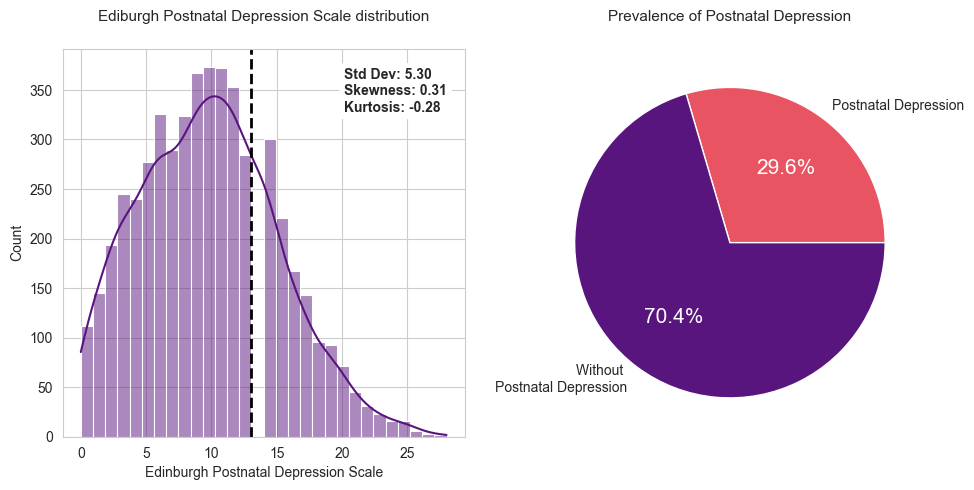

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Calculate statistics
std_dev = df['Edinburgh Postnatal Depression Scale'].std()
skewness = df['Edinburgh Postnatal Depression Scale'].skew()
kurtosis = df['Edinburgh Postnatal Depression Scale'].kurt()

# Histogram
sns.histplot(df['Edinburgh Postnatal Depression Scale'], bins=30, kde=True, color=two_colors[1], ax=ax[0])
ax[0].axvline(13, color='black', linestyle='--', linewidth=2)
ax[0].set_title('Ediburgh Postnatal Depression Scale distribution', size=11, y=1.05)
ax[0].text(0.7, 0.95, f'Std Dev: {std_dev:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', weight='bold',
           transform=ax[0].transAxes, verticalalignment='top', 
           bbox=dict(boxstyle='round', facecolor='white', alpha=1))

# Pie chart
above_13 = sum(df['Edinburgh Postnatal Depression Scale'] >= 13)
below_13 = sum(df['Edinburgh Postnatal Depression Scale'] < 13)
patches, texts, autotexts = ax[1].pie([above_13, below_13], labels=['Postnatal Depression', 'Without \nPostnatal Depression'], autopct='%1.1f%%', colors=two_colors)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(15)
ax[1].set_title('Prevalence of Postnatal Depression', size=11, y=1.05)

plt.tight_layout();

### PROMIS Anxiety
Figure showing the the PROMIS Anxiety data distribution and correlation with Edinburgh Postnatal Depression Scale
* PROMIS Anxiety dataset has a very small positive skew, with moderate negative kurtosis
* The scores for PROMIS Anxiety and Edinburgh Postnatal Depression Scale positively correlated (Pearson, r: 0.803, p: 0.0)

Anxiety is a symptom of postnatal depression, and the intensity to these conditions strongly related to each other.

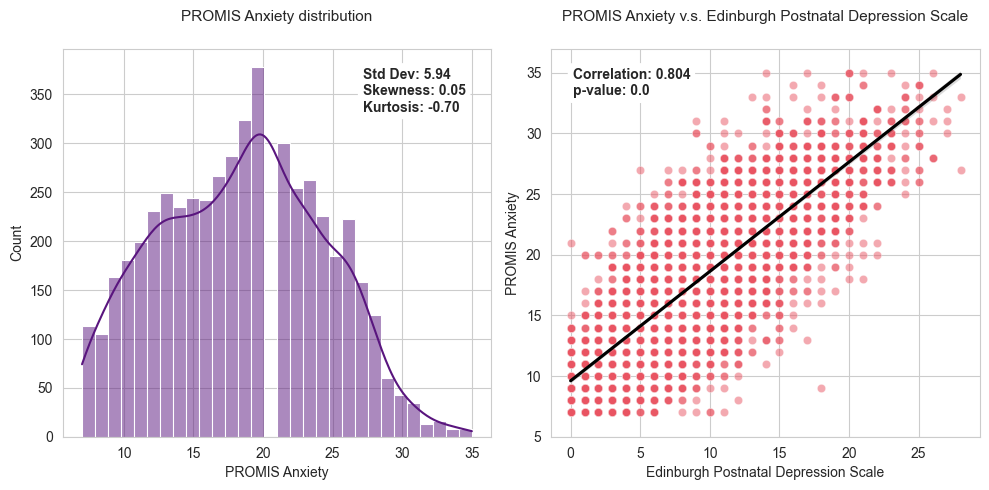

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Calculate statistics
std_dev = df['PROMIS Anxiety'].std()
skewness = df['PROMIS Anxiety'].skew()
kurtosis = df['PROMIS Anxiety'].kurt()

# Histogram
sns.histplot(df['PROMIS Anxiety'], bins=30, kde=True, ax=ax[0], color=two_colors[1])
ax[0].text(0.7, 0.95, f'Std Dev: {std_dev:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', 
           transform=ax[0].transAxes, verticalalignment='top', weight='bold',
           bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[0].set_title('PROMIS Anxiety distribution', size=11, y=1.05)

# Correlation and p-value
correlation, p_value = pearsonr(df['Edinburgh Postnatal Depression Scale'], df['PROMIS Anxiety'])
correlation = round(correlation, 3)

# Scatter plot
sns.scatterplot(x='Edinburgh Postnatal Depression Scale', y='PROMIS Anxiety', data=df, ax=ax[1], color=two_colors[0], alpha=0.5)
sns.regplot(x='Edinburgh Postnatal Depression Scale', y='PROMIS Anxiety', data=df, ax=ax[1], scatter=False, color='black')
ax[1].text(0.05, 0.95, f'Correlation: {correlation}\np-value: {p_value}', 
           transform=ax[1].transAxes, verticalalignment='top', weight='bold',
           bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].set_ylim(bottom=5, top=37)
ax[1].set_title('PROMIS Anxiety v.s. Edinburgh Postnatal Depression Scale', size=11, y=1.05)
plt.tight_layout();

### Scores for the perceived threat of Covid-19

Histograms showing the distribution of responses to the questions about how the threat of Covid-19 was perceived by participants.
* These graphs show that the data for these scores have a non-normal distribution.
* The high variation in responses it likely because of the score range is too large. 
* This feature could be engineered to bin together responses of 1 to 10, 11 to 20 etc., turning it into a 0-10 scoring system.
* Because of the non-normal distribution, I decided not to use these variables in the rest of the project.

This data does show that whilst many people had only a moderate fear that Covid-19 put theirs or their baby's life in danger, many people feared that Covid-19 virus would harm their babies. 

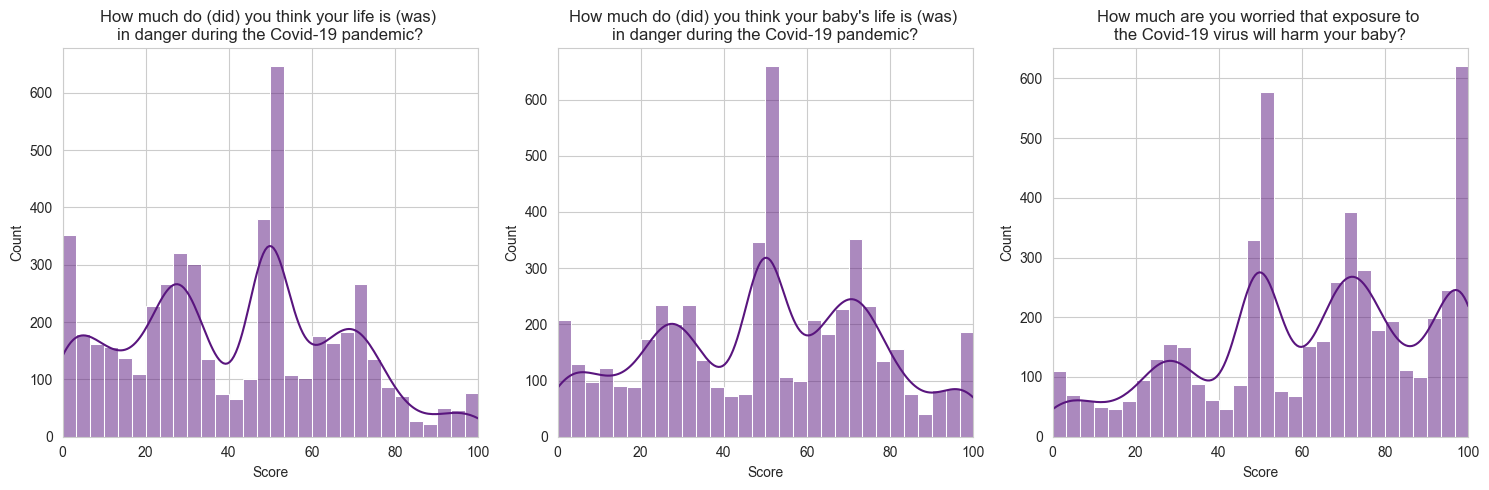

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Threaten Life'], bins=30, kde=True, ax=ax[0], color=two_colors[1])
ax[0].set_title('How much do (did) you think your life is (was) \nin danger during the Covid-19 pandemic?')
ax[0].set_xlabel('Score')
ax[0].set_xlim(0,100)

sns.histplot(df['Threaten Baby Danger'], bins=30, kde=True, ax=ax[1], color=two_colors[1])
ax[1].set_title('How much do (did) you think your baby\'s life is (was) \nin danger during the Covid-19 pandemic?')
ax[1].set_xlabel('Score')
ax[1].set_xlim(0,100)

sns.histplot(df['Threaten Baby Harm'], bins=30, kde=True, ax=ax[2], color=two_colors[1])
ax[2].set_title('How much are you worried that exposure to \nthe Covid-19 virus will harm your baby?')
ax[2].set_xlabel('Score')
ax[2].set_xlim(0,100)

plt.tight_layout();

---

## Newborn health and delivery variables
### Gestational Age At Birth, Birth Length (cm) and Birth Weight (kg)
* The histograms show that the data for these variables are negatively skewed with high positive kurtosis
* The histogram for gestational age at birth shows that some of the babies in this dataset were premature (black line at 37 weeks), which is likely to account for the babies with small birth lengths and weights

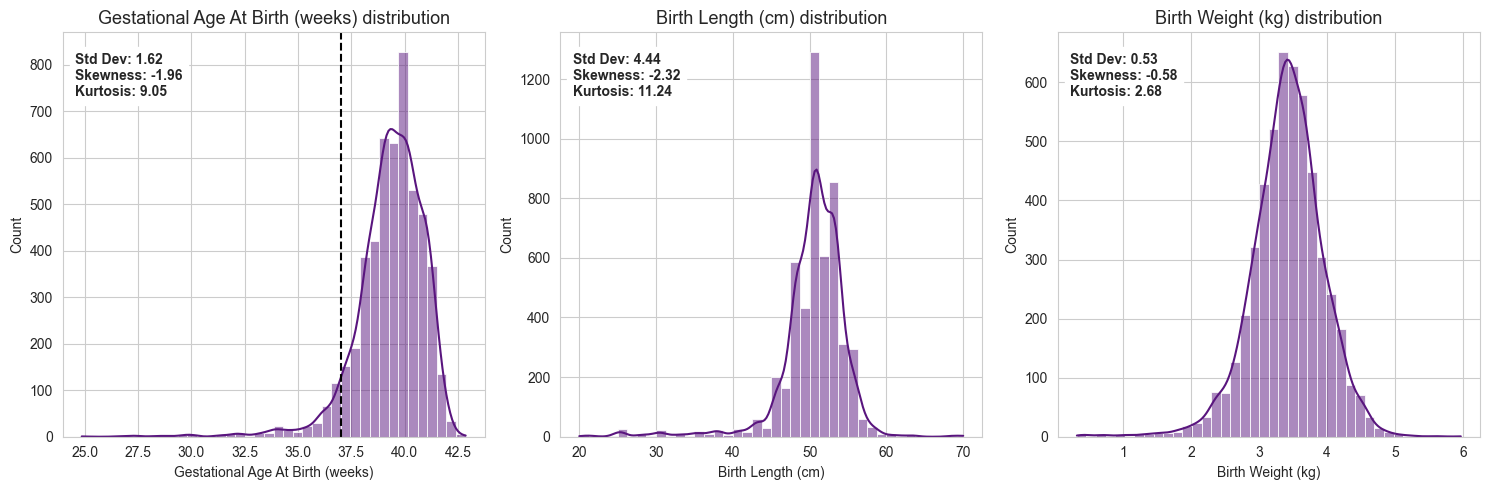

In [17]:
# Histograms showing the distribution of gestational age at birth, birth length and birth weight
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['Gestational Age At Birth (weeks)', 'Birth Length (cm)', 'Birth Weight (kg)']

for i, metric in enumerate(metrics):
    sns.histplot(df[metric], bins=40, kde=True, ax=ax[i], color=two_colors[1])
    ax[i].set_title(f'{metric} distribution', size=13)
    
    # Calculate statistics
    std_dev = df[metric].std()
    skewness = df[metric].skew()
    kurtosis = df[metric].kurt()
    
    ax[i].text(0.03, 0.95, f'Std Dev: {std_dev:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', weight='bold',
               transform=ax[i].transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=1))
    
    if i == 0:
        ax[i].axvline(x=37, color='black', linestyle='--')

plt.tight_layout();

### Delivery mode and NICU stay

* Almost 30% of deliveries in this dataset were via C-section
* Almost 10% of newborns were admitted to NICU
* These percentages are similar to findings from pre-Covid studies (Jing Gu et al. 2020, Fallah et al. 2011)

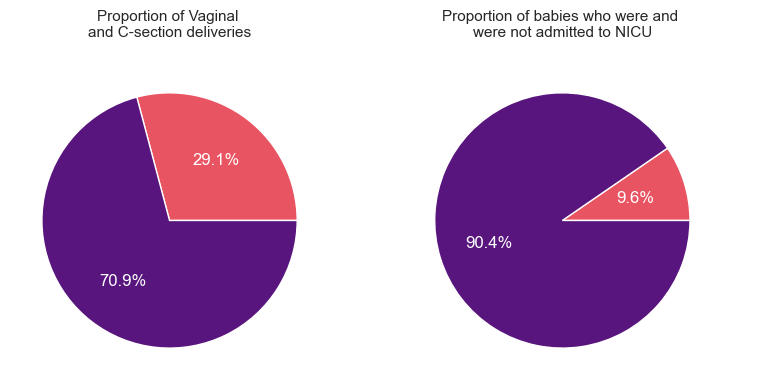

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

v_delivery = sum(df['Delivery Mode'] == 'Vaginally' )
c_delivery = sum(df['Delivery Mode'] == 'C-section')
patches, texts, autotexts = ax[0].pie([c_delivery,v_delivery], labels=['C-Section','Vaginally'], autopct='%1.1f%%', colors=two_colors)
for text, autotext in zip(texts, autotexts):
    text.set_color('white')
    text.set_size(12)
    autotext.set_color('white')
    autotext.set_size(12)
ax[0].set_title('Proportion of Vaginal \nand C-section deliveries', size=11, y=1.05)

n_nicu = sum(df['NICU Stay'] == 'Without NICU stay' )
y_nicu = sum(df['NICU Stay'] == 'With NICU stay')
patches, texts, autotexts = ax[1].pie([y_nicu, n_nicu], labels=['NICU stay', 'Without a \nNICU stay'], autopct='%1.1f%%', colors=two_colors)
for text, autotext in zip(texts, autotexts):
    text.set_color('white')
    text.set_size(12)
    autotext.set_color('white')
    autotext.set_size(12)
ax[1].set_title('Proportion of babies who were and \nwere not admitted to NICU', size=11, y=1.05)

plt.subplots_adjust(wspace=0)
plt.tight_layout();

### Relationships between Gestational Age, Birth Length and Birth Weight

The scatter plots show the relationships between these variables.
* Pearson correlation used to calculate the statistical significance of the relationships.
* Birth weight and gestational age at birth showed a significant, moderate correlation. Whereas gestational age v.s. birth length, and birth length v.s. birth weight both showed significant, weak correlations.
* However, when the data was separated and analysed based on NICU stay, for babies admitted to NICU, gestational age at birth showed had stronger correlations with birth length and birth weight.
* This analysis showed that these three features are not independent of each other.

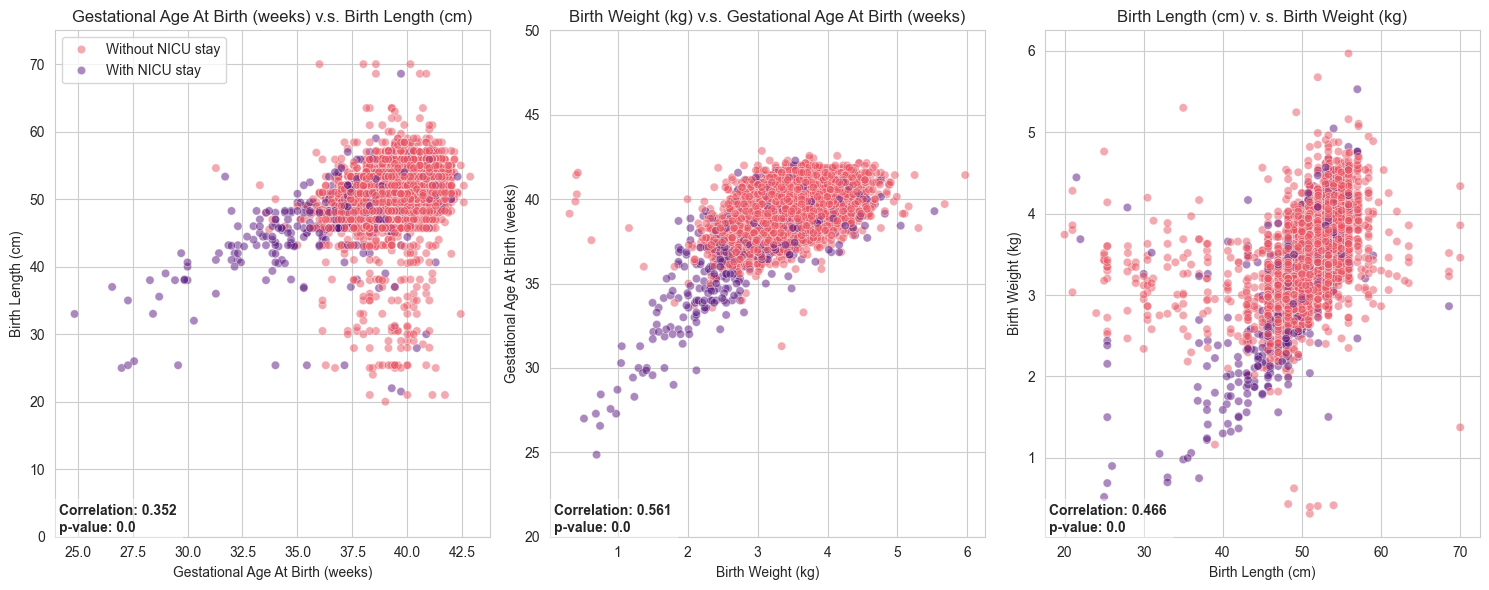

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

correlation, p_value = pearsonr(df['Gestational Age At Birth (weeks)'], df['Birth Length (cm)'])
correlation = round(correlation, 3)
p_value = round(p_value, 3)
sns.scatterplot(x='Gestational Age At Birth (weeks)', y='Birth Length (cm)', data=df, hue='NICU Stay', alpha=0.5, ax=ax[0], palette=two_colors)
ax[0].set_title('Gestational Age At Birth (weeks) v.s. Birth Length (cm)')
ax[0].set_ylim(bottom=0, top=75)
ax[0].text(0.01, 0.01, f'Correlation: {correlation}\np-value: {p_value}', transform=ax[0].transAxes, weight='bold',
           bbox=dict(facecolor='white', alpha=0.4))
ax[0].legend(title=None)

correlation, p_value = pearsonr(df['Birth Weight (kg)'], df['Gestational Age At Birth (weeks)'])
correlation = round(correlation, 3)
p_value = round(p_value, 3)
sns.scatterplot(x='Birth Weight (kg)', y='Gestational Age At Birth (weeks)',data=df, hue='NICU Stay', alpha=0.5, ax=ax[1], palette=two_colors)
ax[1].set_title('Birth Weight (kg) v.s. Gestational Age At Birth (weeks)')
ax[1].set_ylim(bottom=20, top=50)
ax[1].text(0.01, 0.01, f'Correlation: {correlation}\np-value: {p_value}', transform=ax[1].transAxes, weight='bold',
           bbox=dict(facecolor='white', alpha=0.4))
ax[1].legend().remove()

correlation, p_value = pearsonr(df['Birth Length (cm)'], df['Birth Weight (kg)'])
correlation = round(correlation, 3)
p_value = round(p_value, 3)
sns.scatterplot(x='Birth Length (cm)', y='Birth Weight (kg)', data=df, hue='NICU Stay',  alpha=0.5, ax=ax[2], palette=two_colors)
ax[2].set_title('Birth Length (cm) v. s. Birth Weight (kg)')
ax[2].text(0.01, 0.01, f'Correlation: {correlation}\np-value: {p_value}', transform=ax[2].transAxes, weight='bold',
           bbox=dict(facecolor='white', alpha=0.4))
ax[2].legend().remove()

plt.tight_layout();

In [20]:
calculate_correlation(df, 'Gestational Age At Birth (weeks)', 'Birth Length (cm)')
calculate_correlation(df, 'Gestational Age At Birth (weeks)', 'Birth Weight (kg)')
calculate_correlation(df, 'Birth Length (cm)', 'Birth Length (cm)')

Gestational Age At Birth (weeks) and Birth Length (cm), without NICU: correlation: 0.22792, p-value: 0.0
Gestational Age At Birth (weeks) and Birth Length (cm), with NICU: correlation: 0.61149, p-value: 0.0
Gestational Age At Birth (weeks) and Birth Weight (kg), without NICU: correlation: 0.429, p-value: 0.0
Gestational Age At Birth (weeks) and Birth Weight (kg), with NICU: correlation: 0.78429, p-value: 0.0
Birth Length (cm) and Birth Length (cm), without NICU: correlation: 1.0, p-value: 0.0
Birth Length (cm) and Birth Length (cm), with NICU: correlation: 1.0, p-value: 0.0


### Relationships between Gestational Age, Birth Length and Birth Weight, with Delivery Mode and NICU stay

* Gestational Age and Birth Length were significantly lower for babies delivered by C-section
* Babies admitted to NICU had significantly lower Gestational Age, Birth Length and Weight
* The results support that birth complications and baby health problems requiring C-section delivery and NICU care relate to premature births
* Mann-Whitney U test to compare between these groups - non parametric test as the distributions are skewed

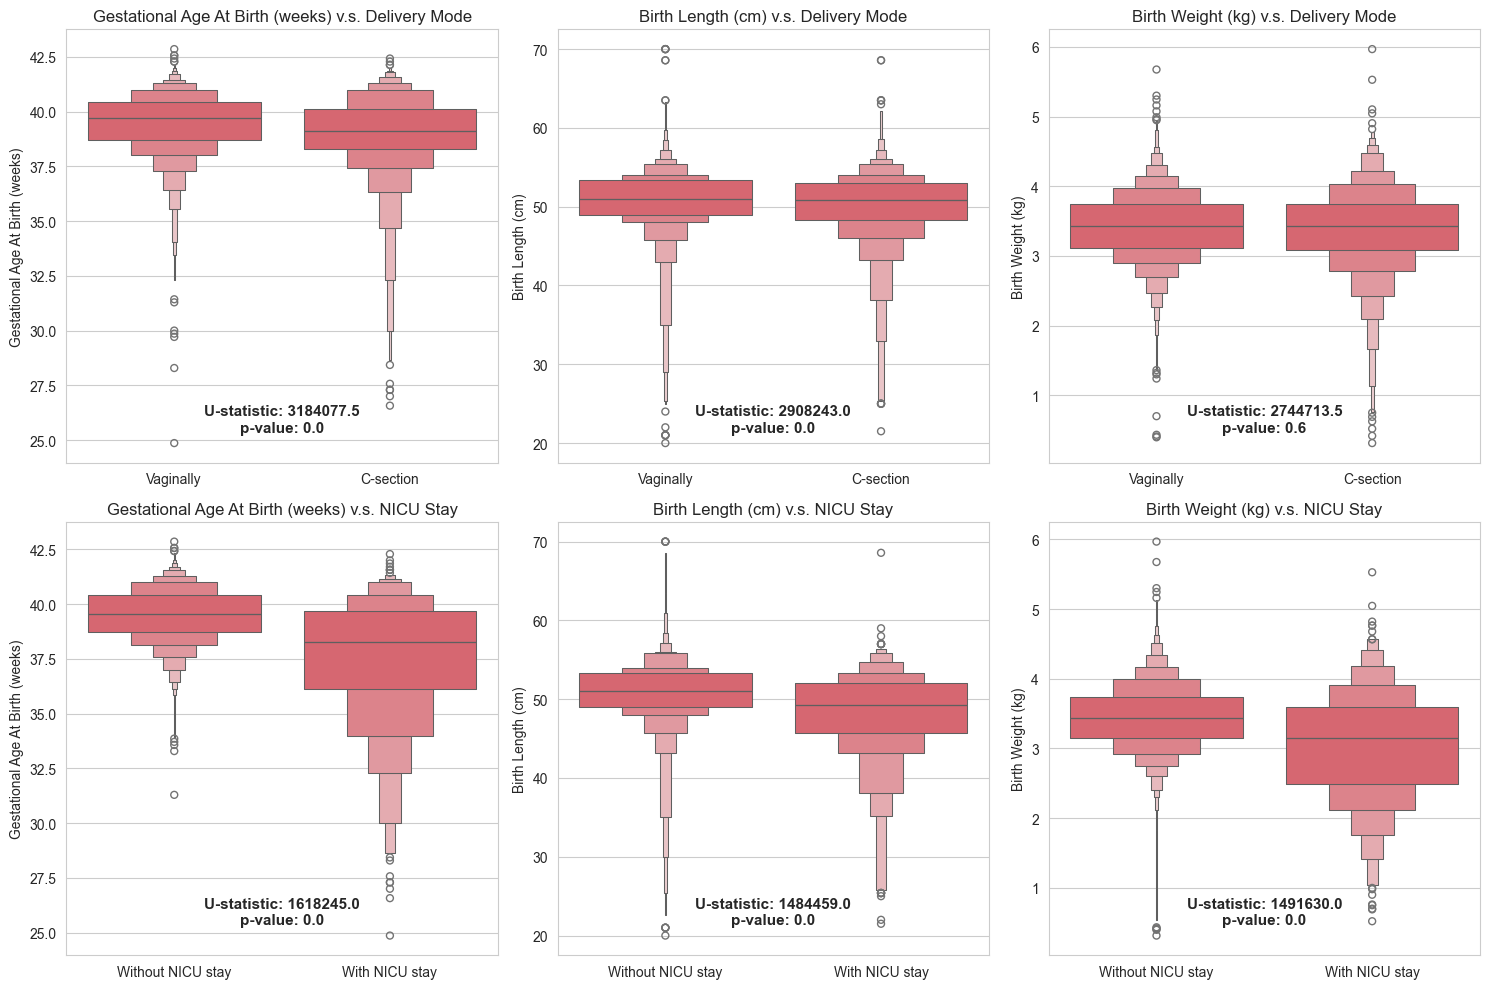

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

metrics = ['Gestational Age At Birth (weeks)', 'Birth Length (cm)', 'Birth Weight (kg)']
categories = ['Delivery Mode', 'NICU Stay']

for i, metric in enumerate(metrics):
    for j, category in enumerate(categories):
        sns.boxenplot(x=category, y=metric, data=df, ax=ax[j, i], color=two_colors[0])
        ax[j, i].set_title(f'{metric} v.s. {category}')
        ax[j, i].set_xlabel('')
        
        # Perform Mann-Whitney U test
        groups = [df[df[category] == mode][metric] for mode in df[category].unique()]
        u_stat, p_val = mannwhitneyu(*groups)
        
        # Add U-statistic and p-value to the plot
        ax[j, i].text(0.5, 0.1, f'U-statistic: {u_stat}\np-value: {round(p_val, 3)}', 
                      horizontalalignment='center', verticalalignment='center', 
                      transform=ax[j, i].transAxes, weight='bold', size=11)

plt.tight_layout();

---
## Personal circumstance variables
### Maternal Age
Histogram below shows that the dataset for this variable has a normal distribution

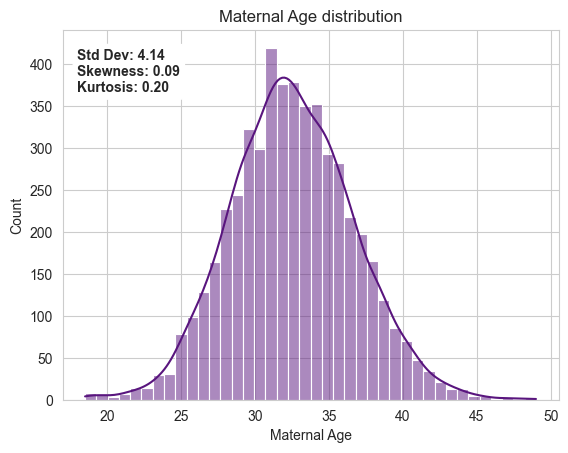

In [22]:
std_dev = df['Maternal Age'].std()
skewness = df['Maternal Age'].skew()
kurtosis = df['Maternal Age'].kurt()

text = f'Std Dev: {std_dev:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}'

sns.histplot(df['Maternal Age'], bins=40, kde=True, color=two_colors[1])
plt.title('Maternal Age distribution')
plt.text(0.03, 0.95, text, 
           verticalalignment='top', 
           transform=plt.gca().transAxes, weight='bold',
           bbox=dict(boxstyle='round', facecolor='white', alpha=1));

### Household Income and Maternal Education

* The plots below show that few people in the dataset had a household income in the two lowest categories
* And few people had an education level lower than College/Trade school

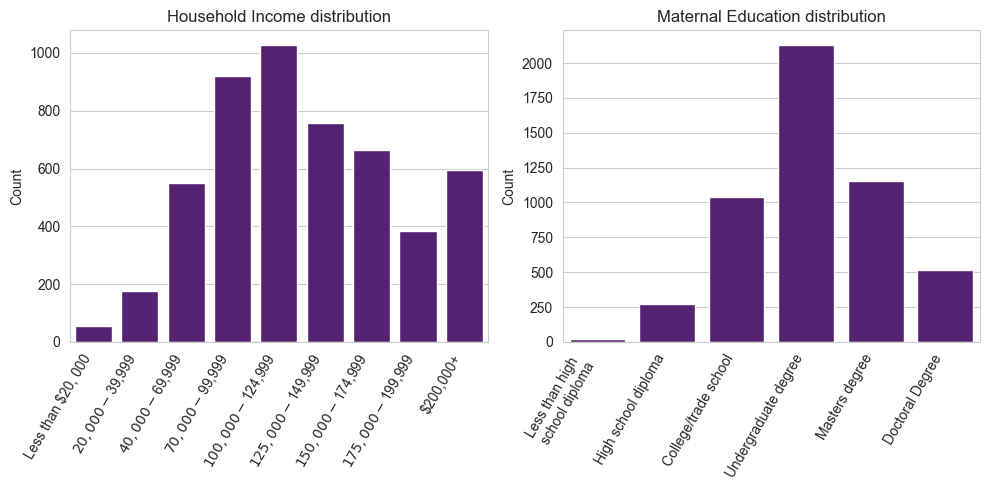

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

order = ['Less than $20, 000', '$20,000- $39,999', '$40,000-$69,999', '$70,000-$99,999', '$100,000 -$124,999', '$125,000- $149,999', '$150,000 - $174,999', '$175,000- $199,999', '$200,000+']
sns.countplot(x='Household Income', data=df, ax=ax[0], order=order, color=two_colors[1])
ax[0].set_xticks(range(len(order)))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60, ha='right')  
ax[0].set_xlabel('')
ax[0].set_ylabel('Count')
ax[0].set_title('Household Income distribution')

order = ['Less than high \nschool diploma', 'High school diploma', 'College/trade school', 'Undergraduate degree', 'Masters degree', 'Doctoral Degree']
sns.countplot(x='Maternal Education', data=df, ax=ax[1], order=order, color=two_colors[1])
ax[1].set_xticks(range(len(order)))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60, ha='right')  
ax[1].set_xlabel('')
ax[1].set_ylabel('Count')
ax[1].set_title('Maternal Education distribution')

plt.tight_layout();

---
## Are the mental health scores related to the delivery features?

**Edinburgh Postnatal Depression Scale/ PROMIS Anxiety did not correlate with Gestational Age, Birth Length and Birth Weight**

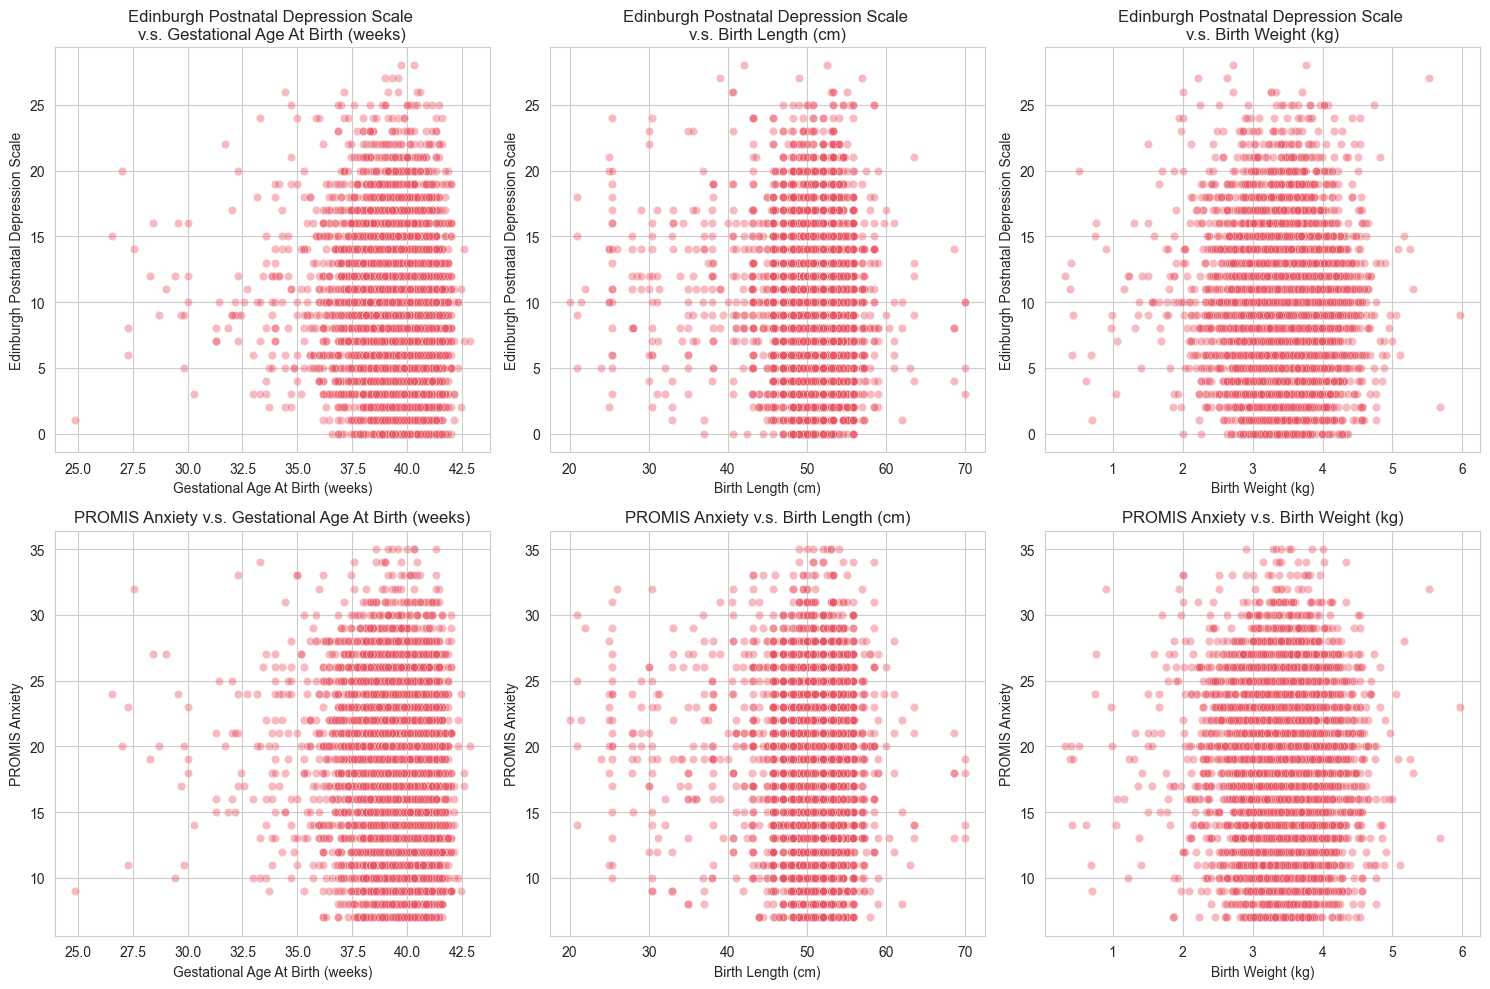

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.scatterplot(y='Edinburgh Postnatal Depression Scale', x='Gestational Age At Birth (weeks)', data=df, alpha=0.4, ax=ax[0, 0], color=two_colors[0])
ax[0, 0].set_title('Edinburgh Postnatal Depression Scale \nv.s. Gestational Age At Birth (weeks)')

sns.scatterplot(y='Edinburgh Postnatal Depression Scale', x='Birth Length (cm)', data=df, alpha=0.4, ax=ax[0, 1], color=two_colors[0])
ax[0, 1].set_title('Edinburgh Postnatal Depression Scale \nv.s. Birth Length (cm)')

sns.scatterplot(y='Edinburgh Postnatal Depression Scale', x='Birth Weight (kg)', data=df, alpha=0.4, ax=ax[0, 2], color=two_colors[0])
ax[0, 2].set_title('Edinburgh Postnatal Depression Scale \nv.s. Birth Weight (kg)')

sns.scatterplot(y='PROMIS Anxiety', x='Gestational Age At Birth (weeks)', data=df, alpha=0.4, ax=ax[1, 0], color=two_colors[0])
ax[1, 0].set_title('PROMIS Anxiety v.s. Gestational Age At Birth (weeks)')

sns.scatterplot(y='PROMIS Anxiety', x='Birth Length (cm)', data=df, alpha=0.4, ax=ax[1, 1], color=two_colors[0])
ax[1, 1].set_title('PROMIS Anxiety v.s. Birth Length (cm)')

sns.scatterplot(y='PROMIS Anxiety', x='Birth Weight (kg)', data=df, alpha=0.4, ax=ax[1, 2], color=two_colors[0])
ax[1, 2].set_title('PROMIS Anxiety v.s. Birth Weight (kg)')

plt.tight_layout();

**Edinburgh Postnatal Depression Scale/ PROMIS Anxiety scores were higher for people who had C-sections, and whose babies were admitted to NICU**

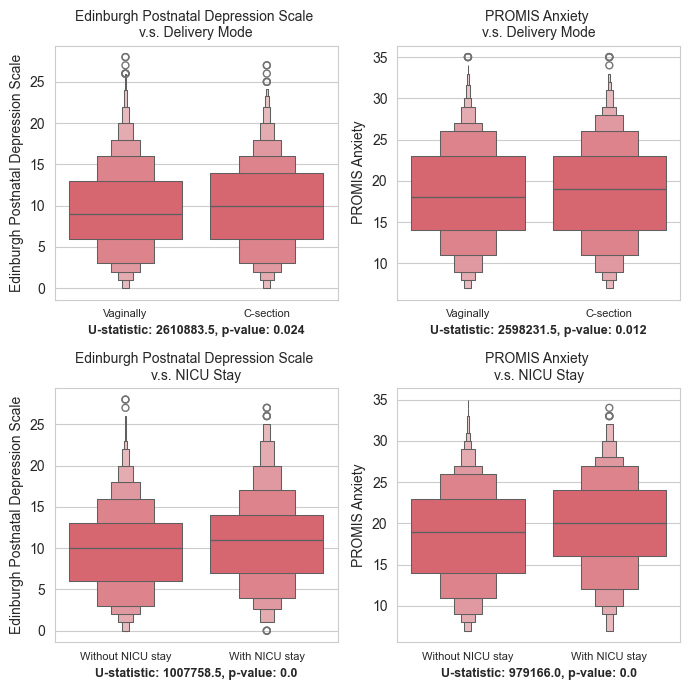

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

metrics = ['Edinburgh Postnatal Depression Scale', 'PROMIS Anxiety']
categories = ['Delivery Mode', 'NICU Stay']

for i, metric in enumerate(metrics):
    for j, category in enumerate(categories):
        sns.boxenplot(x=category, y=metric, data=df, ax=ax[j, i], color=two_colors[0])
        ax[j, i].set_title(f'{metric} \nv.s. {category}', size=10)
        
        ax[j, i].set_xticks(range(len(df[category].unique())))
        ax[j, i].tick_params(axis='x', labelsize=8)
        
        groups = [df[df[category] == mode][metric] for mode in df[category].unique()]
        u_stat, p_val = mannwhitneyu(*groups)
        
        ax[j, i].set_xlabel(f'U-statistic: {u_stat}, p-value: {round(p_val, 3)}', size=9, weight='bold')
        

plt.tight_layout();

---
### How did the participants' personal circumstances relate to their mental health scores?

**There was no correlation between their ages, and their postnatal depression and anxiety scores**

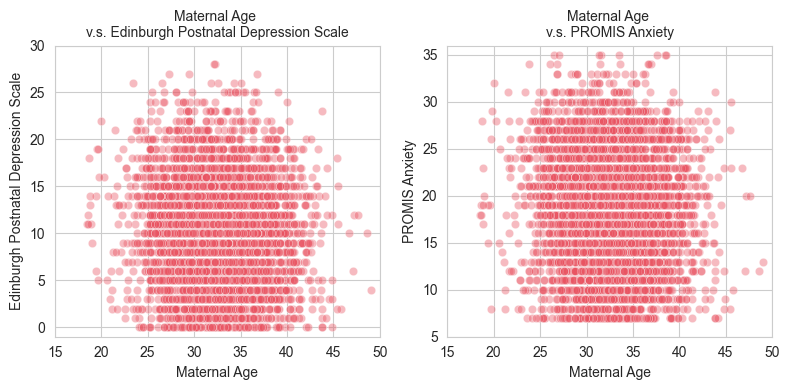

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.scatterplot(x='Maternal Age', y='Edinburgh Postnatal Depression Scale', data=df,alpha=0.4, ax=ax[0], color=two_colors[0])
ax[0].set_title('Maternal Age \nv.s. Edinburgh Postnatal Depression Scale', size=10)
ax[0].set_xlim(15, 50)
ax[0].set_ylim(-1, 30)

sns.scatterplot(x='Maternal Age', y='PROMIS Anxiety', data=df, alpha=0.4, ax=ax[1], color=two_colors[0])
ax[1].set_title('Maternal Age \nv.s. PROMIS Anxiety', size=10)
ax[1].set_xlim(15, 50)
ax[1].set_ylim(5, 36)

plt.tight_layout();

**Participants with lower household incomes tended to have higher postnatal depression and anxiety scores**
* One-way ANOVA to statistically compare Edinburgh Postnatal Depression Scale and PROMIS Anxiety between the Household Income categories
* Tukey test post-hoc analysis

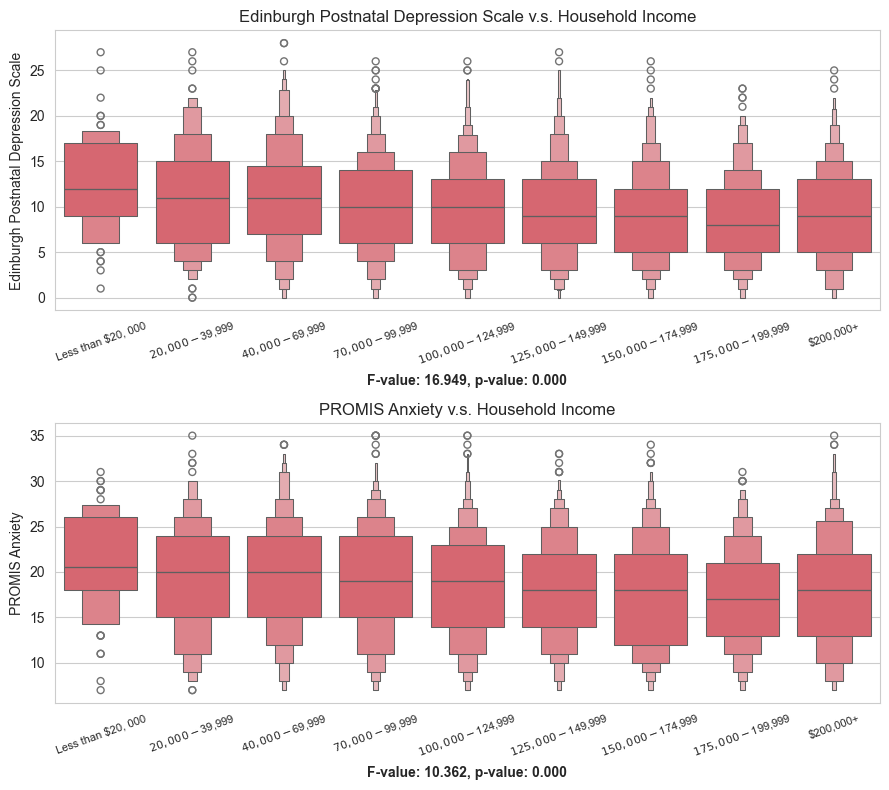

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(9, 8))

order = ['Less than $20, 000', '$20,000- $39,999', '$40,000-$69,999', '$70,000-$99,999', '$100,000 -$124,999', '$125,000- $149,999', '$150,000 - $174,999', '$175,000- $199,999', '$200,000+']
metrics = ['Edinburgh Postnatal Depression Scale', 'PROMIS Anxiety']

for i, metric in enumerate(metrics):
    sns.boxenplot(x='Household Income', y=metric, data=df, order=order, ax=ax[i], color=two_colors[0])
    ax[i].set_xticks(range(len(order)))
    ax[i].set_title(f'{metric} v.s. Household Income', size=12)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=20, size=8)

    groups = [df[df['Household Income'] == income][metric].dropna() for income in order]
    f_val, p_val = f_oneway(*groups)

    ax[i].set_xlabel(f'F-value: {f_val:.3f}, p-value: {p_val:.3f}', weight='bold', size=10)

plt.tight_layout();


In [28]:
perform_tukey_test(df, 'Edinburgh Postnatal Depression Scale', 'Household Income')

Significant Tukey HSD test results for Edinburgh Postnatal Depression Scale:
                 group1              group2  meandiff   p-adj   lower   upper  \
2    $100,000 -$124,999  $175,000- $199,999   -1.1071  0.0122 -2.0785 -0.1358   
3    $100,000 -$124,999    $20,000- $39,999    1.6233  0.0044  0.3017  2.9449   
5    $100,000 -$124,999     $40,000-$69,999    1.5277  0.0000  0.6702  2.3853   
7    $100,000 -$124,999  Less than $20, 000    3.0445  0.0010  0.7773  5.3117   
10   $125,000- $149,999    $20,000- $39,999    1.7924  0.0014  0.4369  3.1479   
12   $125,000- $149,999     $40,000-$69,999    1.6968  0.0000  0.7879  2.6057   
14   $125,000- $149,999  Less than $20, 000    3.2136  0.0005  0.9264  5.5007   
16  $150,000 - $174,999    $20,000- $39,999    2.2494  0.0000  0.8759  3.6229   
18  $150,000 - $174,999     $40,000-$69,999    2.1539  0.0000  1.2183  3.0894   
19  $150,000 - $174,999     $70,000-$99,999    1.2506  0.0001  0.4240  2.0772   
20  $150,000 - $174,999  Less th

In [29]:
perform_tukey_test(df, 'PROMIS Anxiety', 'Household Income')

Significant Tukey HSD test results for PROMIS Anxiety:
                 group1               group2  meandiff   p-adj   lower  \
1    $100,000 -$124,999  $150,000 - $174,999   -0.9176  0.0468 -1.8286   
2    $100,000 -$124,999   $175,000- $199,999   -1.2504  0.0119 -2.3453   
5    $100,000 -$124,999      $40,000-$69,999    0.9848  0.0419  0.0183   
12   $125,000- $149,999      $40,000-$69,999    1.3850  0.0009  0.3605   
13   $125,000- $149,999      $70,000-$99,999    0.9199  0.0396  0.0224   
14   $125,000- $149,999   Less than $20, 000    2.8285  0.0192  0.2506   
16  $150,000 - $174,999     $20,000- $39,999    1.8026  0.0093  0.2545   
18  $150,000 - $174,999      $40,000-$69,999    1.9024  0.0000  0.8480   
19  $150,000 - $174,999      $70,000-$99,999    1.4374  0.0001  0.5057   
20  $150,000 - $174,999   Less than $20, 000    3.3459  0.0020  0.7559   
21   $175,000- $199,999     $20,000- $39,999    2.1355  0.0022  0.4726   
23   $175,000- $199,999      $40,000-$69,999    2.2353  0

**Participants with lower education levels tended to have higher postnatal depression and anxiety scores**

* One-way ANOVA to statistically compare Edinburgh Postnatal Depression Scale and PROMIS Anxiety between the Maternal Education categories
* Tukey test post-hoc analysis

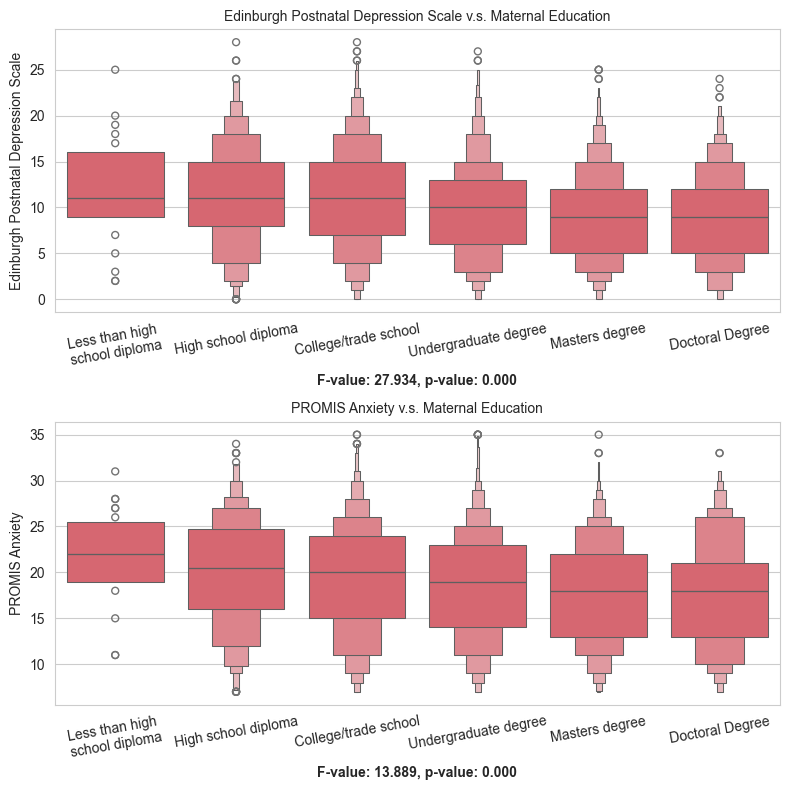

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

order = ['Less than high \nschool diploma', 'High school diploma', 'College/trade school', 'Undergraduate degree', 'Masters degree', 'Doctoral Degree']
metrics = ['Edinburgh Postnatal Depression Scale', 'PROMIS Anxiety']

for i, metric in enumerate(metrics):
    sns.boxenplot(x='Maternal Education', y=metric, data=df, order=order, ax=ax[i], color=two_colors[0])
    ax[i].set_xticks(range(len(order)))
    ax[i].set_title(f'{metric} v.s. Maternal Education', size=10)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=10)

    # Perform One-way ANOVA
    groups = [df[df['Maternal Education'] == edu][metric] for edu in order]
    f_val, p_val = f_oneway(*groups)

    # Add F-value and p-value to the plot
    ax[i].set_xlabel(f'F-value: {f_val:.3f}, p-value: {p_val:.3f}', weight='bold', size=10)

plt.tight_layout();

In [31]:
perform_tukey_test(df, 'Edinburgh Postnatal Depression Scale', 'Maternal Education')

Significant Tukey HSD test results for Edinburgh Postnatal Depression Scale:
                             group1                           group2  \
0              College/trade school                  Doctoral Degree   
3              College/trade school                   Masters degree   
4              College/trade school             Undergraduate degree   
5                   Doctoral Degree              High school diploma   
6                   Doctoral Degree  Less than high \nschool diploma   
8                   Doctoral Degree             Undergraduate degree   
10              High school diploma                   Masters degree   
11              High school diploma             Undergraduate degree   
12  Less than high \nschool diploma                   Masters degree   
14                   Masters degree             Undergraduate degree   

    meandiff   p-adj   lower   upper  reject  
0    -2.3028  0.0000 -3.1069 -1.4987    True  
3    -2.0721  0.0000 -2.7088 -1.4353

In [32]:
perform_tukey_test(df, 'PROMIS Anxiety', 'Maternal Education')

Significant Tukey HSD test results for PROMIS Anxiety:
                             group1                           group2  \
0              College/trade school                  Doctoral Degree   
3              College/trade school                   Masters degree   
4              College/trade school             Undergraduate degree   
5                   Doctoral Degree              High school diploma   
6                   Doctoral Degree  Less than high \nschool diploma   
10              High school diploma                   Masters degree   
11              High school diploma             Undergraduate degree   
12  Less than high \nschool diploma                   Masters degree   

    meandiff   p-adj   lower   upper  reject  
0    -1.5752  0.0000 -2.4831 -0.6673    True  
3    -1.5269  0.0000 -2.2458 -0.8080    True  
4    -0.9237  0.0005 -1.5601 -0.2872    True  
5     2.2316  0.0000  0.9660  3.4972    True  
6     3.9875  0.0192  0.3998  7.5751    True  
10   -2.1832  

---
### Delivery Date
**Were participants more likely to develop postnatal mental health problems if they gave birth early in the pandemic?**

The graph below shows the data distribution of the number of babies born in each month

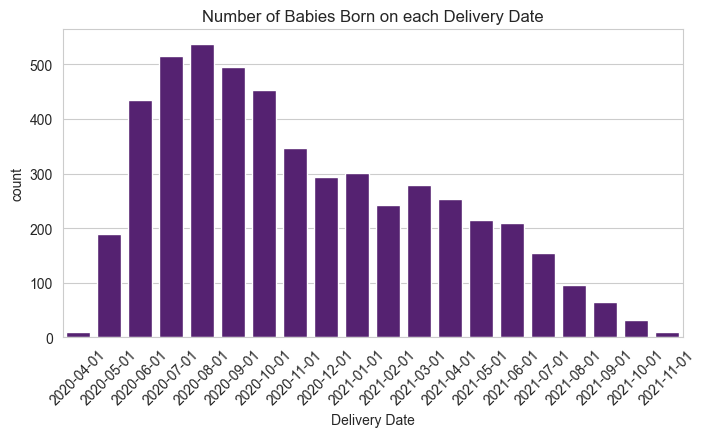

In [33]:
df['Delivery Date'] = df['Delivery Date'].dt.to_timestamp()
df = df.sort_values('Delivery Date', ascending=True)

plt.figure(figsize=(8, 4))
sns.countplot(x='Delivery Date', data=df, color=two_colors[1])

plt.xticks(rotation=45)  
plt.title('Number of Babies Born on each Delivery Date')
plt.xlabel('Delivery Date')
plt.show()

**Participants who gave birth early in the pandemic tended to have higher postnatal depression and anxiety scores**

* One-way ANOVA analysis found a signficant difference in the Edinburgh Postnatal Depression Scale and PROMIS Anxiety scores depending on the Delivery Date
* Tukey post-hoc analysis showed that for participants who gave birth in May and June of 2020 had significantly higher mental health scores than people who gave birth in some of the later months in the pandemic

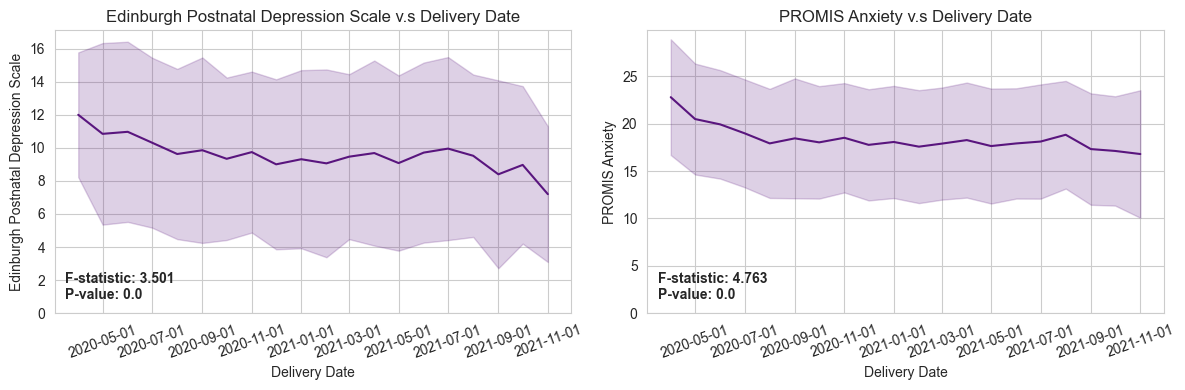

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

metrics = ['Edinburgh Postnatal Depression Scale', 'PROMIS Anxiety']

for i, metric in enumerate(metrics):
    sns.lineplot(x='Delivery Date', y=metric, data=df, errorbar='sd', ax=ax[i], color=two_colors[1])
    ax[i].set_ylim(bottom=0)
    ax[i].set_xticks(ax[i].get_xticks())  # Set ticks first
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=20)  # Then set tick labels
    ax[i].set_title(f'{metric} v.s Delivery Date', size=12)

    # Conduct one-way ANOVA
    delivery_dates = df['Delivery Date']
    scores = df[metric]
    f_statistic, p_value = f_oneway(*[scores[delivery_dates == date] for date in delivery_dates.unique()])

    # Add F-statistic and p-value to the plot
    ax[i].text(0.02, 0.05, f'F-statistic: {f_statistic:.3f}\nP-value: {round(p_value, 5)}', 
               transform=ax[i].transAxes, weight='bold', size=10)

plt.tight_layout()

In [35]:
perform_tukey_test(df, 'Edinburgh Postnatal Depression Scale', 'Delivery Date')

Significant Tukey HSD test results for Edinburgh Postnatal Depression Scale:
       group1     group2  meandiff   p-adj   lower   upper  reject
25 2020-05-01 2020-12-01   -1.8432  0.0250 -3.5865 -0.0998    True
38 2020-06-01 2020-08-01   -1.3426  0.0120 -2.5487 -0.1364    True
40 2020-06-01 2020-10-01   -1.6324  0.0007 -2.8876 -0.3771    True
42 2020-06-01 2020-12-01   -1.9667  0.0001 -3.3784 -0.5550    True
43 2020-06-01 2021-01-01   -1.6578  0.0045 -3.0597 -0.2559    True
44 2020-06-01 2021-02-01   -1.9081  0.0011 -3.4076 -0.4086    True
45 2020-06-01 2021-03-01   -1.5042  0.0278 -2.9384 -0.0700    True
47 2020-06-01 2021-05-01   -1.8910  0.0029 -3.4499 -0.3322    True
51 2020-06-01 2021-09-01   -2.5701  0.0335 -5.0566 -0.0836    True



In [36]:
perform_tukey_test(df, 'PROMIS Anxiety', 'Delivery Date')

Significant Tukey HSD test results for PROMIS Anxiety:
       group1     group2  meandiff   p-adj   lower   upper  reject
21 2020-05-01 2020-08-01   -2.5703  0.0000 -4.3398 -0.8008    True
22 2020-05-01 2020-09-01   -2.0364  0.0085 -3.8248 -0.2480    True
23 2020-05-01 2020-10-01   -2.4612  0.0003 -4.2729 -0.6495    True
24 2020-05-01 2020-11-01   -1.9762  0.0292 -3.8676 -0.0848    True
25 2020-05-01 2020-12-01   -2.7234  0.0001 -4.6739 -0.7728    True
26 2020-05-01 2021-01-01   -2.4190  0.0017 -4.3607 -0.4773    True
27 2020-05-01 2021-02-01   -2.9136  0.0001 -4.9445 -0.8826    True
28 2020-05-01 2021-03-01   -2.5960  0.0005 -4.5670 -0.6250    True
29 2020-05-01 2021-04-01   -2.2204  0.0135 -4.2302 -0.2106    True
30 2020-05-01 2021-05-01   -2.8502  0.0002 -4.9363 -0.7641    True
31 2020-05-01 2021-06-01   -2.5734  0.0024 -4.6735 -0.4733    True
32 2020-05-01 2021-07-01   -2.3752  0.0289 -4.6464 -0.1040    True
34 2020-05-01 2021-09-01   -3.1690  0.0263 -6.1773 -0.1607    True
38 2020

**Were there cumulative affects on mental health depending on delivery date and delivery experiences?**

* The graphs below show the Ediburgh Postnatal Depression Scale and PROMIS Anxiety score, plotted against Delivery Date, and separated for based on Delivery Mode and NICU Stay
* People who delivered via C-section tended to have a slightly higher postnatal depression and anxiety scores over the time-frame
* People whose babies were admitted to NICU also tended to have higher postnatal depression and anxiety scores

/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/2070609053.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=20)
/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/2070609053.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=20)
/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/2070609053.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=20)
/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/2070609053.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

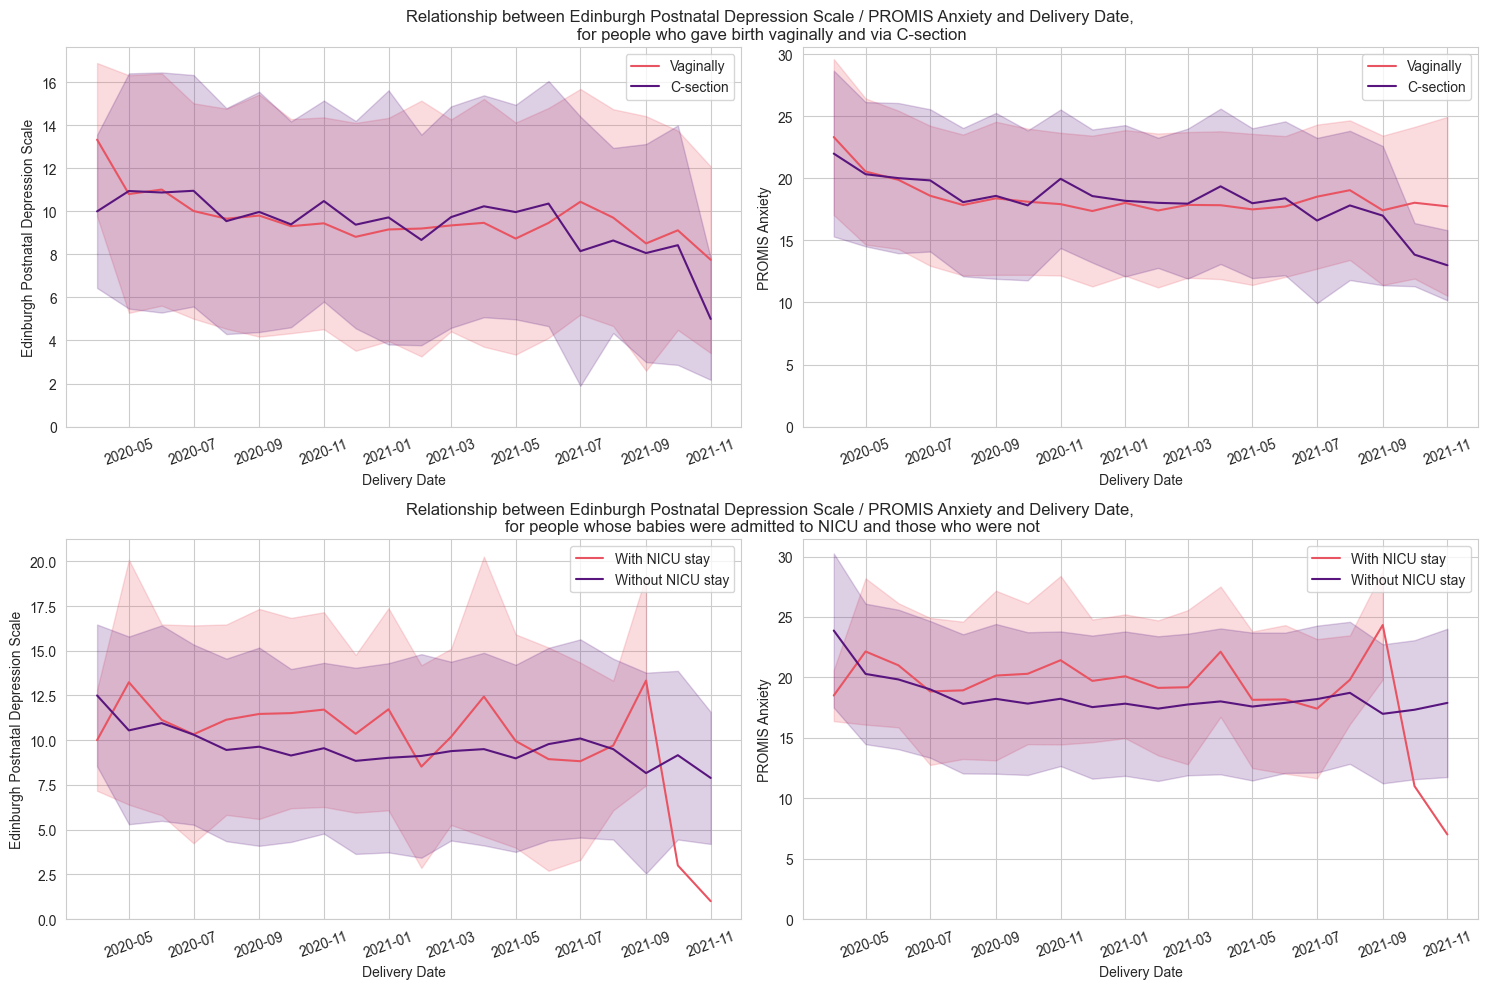

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x='Delivery Date', y='Edinburgh Postnatal Depression Scale', hue='Delivery Mode', data=df,errorbar='sd', ax=ax[0,0], palette=two_colors)
ax[0,0].set_ylim(bottom=0)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=20)

sns.lineplot(x='Delivery Date', y='PROMIS Anxiety', hue='Delivery Mode', data=df, errorbar='sd', ax=ax[0,1], palette=two_colors)
ax[0,1].set_ylim(bottom=0)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=20)

sns.lineplot(x='Delivery Date', y='Edinburgh Postnatal Depression Scale', hue='NICU Stay', data=df,errorbar='sd', ax=ax[1,0], palette=two_colors)
ax[1,0].set_ylim(bottom=0)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=20)

sns.lineplot(x='Delivery Date', y='PROMIS Anxiety', data=df, hue='NICU Stay', errorbar='sd', ax=ax[1,1], palette=two_colors)
ax[1,1].set_ylim(bottom=0)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=20)

# Remove the title of the legend
ax[0,0].legend(title=None)
ax[0,1].legend(title=None)
ax[1,0].legend(title=None)
ax[1,1].legend(title=None)

ax0 = fig.add_subplot(211, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.title('Relationship between Edinburgh Postnatal Depression Scale / PROMIS Anxiety and Delivery Date, \nfor people who gave birth vaginally and via C-section')
ax0.axis('off')

ax1 = fig.add_subplot(212, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.title('Relationship between Edinburgh Postnatal Depression Scale / PROMIS Anxiety and Delivery Date, \nfor people whose babies were admitted to NICU and those who were not')
ax1.axis('off')

plt.tight_layout();

**Gestational Age at Birth, Birth Lengths and Birth Weights were lower at the beginning of the pandemic**

* One-way ANOVA found a significant difference in all three measures depending on Delivery Date
* Tukey post-hoc analysis showed that Gestational Age At Birth was significantly lower for babies born in April and May 2020, compared later months
* This indicates that there were more premature births early on in the pandemic

/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/3038012578.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=20)
/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/3038012578.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=20)
/var/folders/2h/4h1z1tm56915jhm3z7p2n4h40000gn/T/ipykernel_48631/3038012578.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=20)


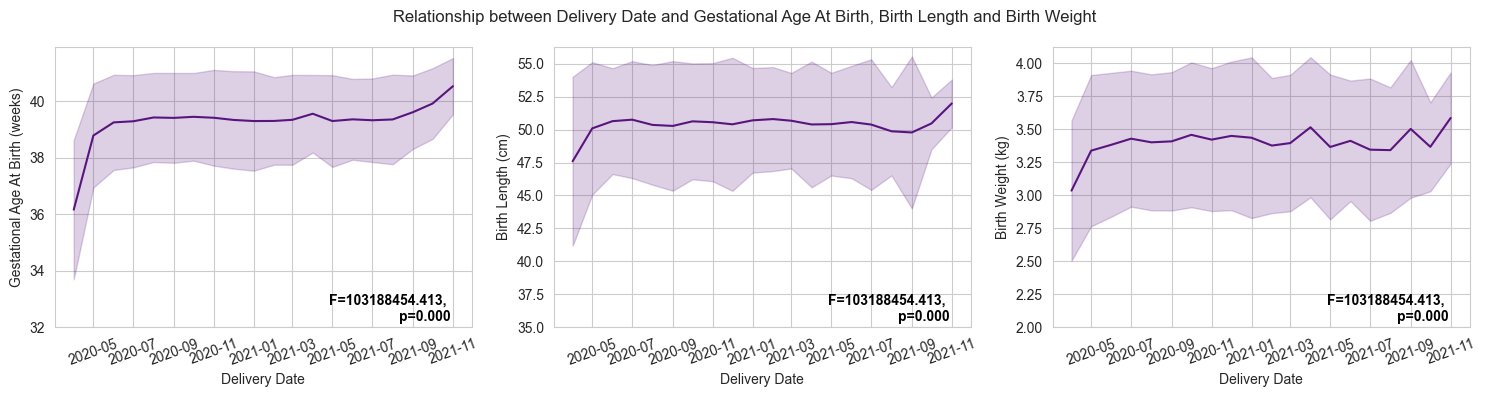

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Gestational Age At Birth (weeks)
sns.lineplot(x='Delivery Date', y='Gestational Age At Birth (weeks)', data=df, errorbar='sd', ax=ax[0], color=two_colors[1])
f_val, p_val = f_oneway(df['Delivery Date'], df['Gestational Age At Birth (weeks)'])
ax[0].text(.95, .01, f'F={f_val:.3f}, \np={p_val:.3f}', verticalalignment='bottom', horizontalalignment='right', transform=ax[0].transAxes, color='black', fontsize=10, fontweight='bold')
ax[0].set_ylim(bottom=32)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=20)

# Birth Length (cm)
sns.lineplot(x='Delivery Date', y='Birth Length (cm)', data=df, errorbar='sd', ax=ax[1], color=two_colors[1])
f_val, p_val = f_oneway(df['Delivery Date'], df['Birth Length (cm)'])
ax[1].text(.95, .01, f'F={f_val:.3f}, \np={p_val:.3f}', verticalalignment='bottom', horizontalalignment='right', transform=ax[1].transAxes, color='black', fontsize=10, fontweight='bold')
ax[1].set_ylim(bottom=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=20)

# Birth Weight (kg)
sns.lineplot(x='Delivery Date', y='Birth Weight (kg)', data=df, errorbar='sd', ax=ax[2], color=two_colors[1])
f_val, p_val = f_oneway(df['Delivery Date'], df['Birth Weight (kg)'])
ax[2].text(.95, .01, f'F={f_val:.3f}, \np={p_val:.3f}', verticalalignment='bottom', horizontalalignment='right', transform=ax[2].transAxes, color='black', fontsize=10, fontweight='bold')
ax[2].set_ylim(bottom=2)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=20)

fig.suptitle('Relationship between Delivery Date and Gestational Age At Birth, Birth Length and Birth Weight')
plt.tight_layout();

In [39]:
perform_tukey_test(df, 'Gestational Age At Birth (weeks)', 'Delivery Date')

Significant Tukey HSD test results for Gestational Age At Birth (weeks):
       group1     group2  meandiff   p-adj   lower   upper  reject
0  2020-04-01 2020-05-01    2.6246  0.0001  0.7731  4.4762    True
1  2020-04-01 2020-06-01    3.0897  0.0000  1.2646  4.9148    True
2  2020-04-01 2020-07-01    3.1289  0.0000  1.3070  4.9508    True
3  2020-04-01 2020-08-01    3.2636  0.0000  1.4424  5.0848    True
4  2020-04-01 2020-09-01    3.2490  0.0000  1.4265  5.0716    True
5  2020-04-01 2020-10-01    3.2865  0.0000  1.4622  5.1108    True
6  2020-04-01 2020-11-01    3.2530  0.0000  1.4227  5.0833    True
7  2020-04-01 2020-12-01    3.1764  0.0000  1.3415  5.0112    True
8  2020-04-01 2021-01-01    3.1369  0.0000  1.3027  4.9711    True
9  2020-04-01 2021-02-01    3.1406  0.0000  1.2993  4.9820    True
10 2020-04-01 2021-03-01    3.1812  0.0000  1.3447  5.0177    True
11 2020-04-01 2021-04-01    3.3954  0.0000  1.5558  5.2351    True
12 2020-04-01 2021-05-01    3.1372  0.0000  1.2913  4.98

In [40]:
perform_tukey_test(df, 'Birth Length (cm)', 'Delivery Date')

Significant Tukey HSD test results for Birth Length (cm):
Empty DataFrame
Columns: [group1, group2, meandiff, p-adj, lower, upper, reject]
Index: []



In [41]:
perform_tukey_test(df, 'Birth Weight (kg)', 'Delivery Date')

Significant Tukey HSD test results for Birth Weight (kg):
Empty DataFrame
Columns: [group1, group2, meandiff, p-adj, lower, upper, reject]
Index: []



In [42]:
df['Household Income'].unique()

array(['$200,000+', '$150,000 - $174,999', '$70,000-$99,999',
       '$125,000- $149,999', '$100,000 -$124,999', '$175,000- $199,999',
       '$20,000- $39,999', '$40,000-$69,999', 'Less than $20, 000'],
      dtype=object)

In [43]:
# Define a dictionary to map old categories to new ones
merge_dict = {
    'Less than $20, 000': '< $39,999',
    '$20,000- $39,999': '< $39,999',
    '$40,000-$69,999': '$40,000 - $99,999',
    '$70,000-$99,999': '$40,000 - $99,999',
    '$100,000 -$124,999': '$100,000 - $149,999',
    '$125,000- $149,999': '$100,000 - $149,999',
    '$150,000 - $174,999': '$150,000 - $199,999',
    '$175,000- $199,999': '$150,000 - $199,999',
    '$200,000+': '$200,000+'
}

# Create a new column by mapping the old one
df.insert(11, 'Household Income merged', df['Household Income'].map(merge_dict))

In [44]:
df.head(1)

,Delivery Date,Edinburgh Postnatal Depression Scale,PROMIS Anxiety,Maternal Age,Gestational Age At Birth (weeks),Birth Length (cm),Birth Weight (kg),Threaten Life,Threaten Baby Danger,Threaten Baby Harm,Household Income,Household Income merged,Maternal Education,Delivery Mode,NICU Stay,Language
2150,2020-04-01,12.0,17.0,34.7,32.29,41.0,1.871,62.0,80.0,100.0,"$200,000+","$200,000+",Masters degree,Vaginally,With NICU stay,English


## EDA findings

* Edinburgh Postnatal Depression Scale and PROMIS Anxiety were highly postively correlated.
* C-section deliveries were more likely to be needed for babies born at lower gestational ages, and with lower birth lengths and weights.
* Babies with lower gestational ages at birth, and lower birth lengths and weights were more likely to be admitted to NICU.
* People who delivered via C-section and whose babies were admitted to NICU were more likely to have higher postnatal depression and anxiety scores.
* People who gave birth very early on in the pandemic tended to have higher postnatal depression and anxiety score.
* Babies born at the beginning on the pandemic tended to have lower gestational ages at birth, and lower lengths and weights.

The findings paint a picture that giving birth in the early months of the Covid-19 pandemic was a very stressful experience and increased the likelihood of people developing postnatal depression - with higher scores in the EPDS and PROMIS Anxiety score. This coincided with babies being born at lower gestational ages and with smaller body sizes, indicating an impact on baby health. It seems that people who experienced birth complications and problems with their baby's health, requiring a C-section delivery and/or admittance to NICU, had worsened mental health outcomes. Moreover, people who experienced additional hardships, such as having lower household income and lower education levels, were more vulnerable to postnatal depression. Taken together, this indicates that should such a large-scale disaster happen again, providing mental health support to pregnant people, especially those who experience birth complications, and financial support for people experiencing financial hardship, should improve maternal mental health. 

#### Additional points to concider:
* The dataset did not include anything about maternal physical health, such as whether they had any pre-existing conditions prior to pregrnancy.
* We don't know whether the participants, or someone close to them, had been infected with Covid-19 - which is likely to impact their perception of the pandemic.
* We don't know whether the participants gave birth at home or in a hospital - which may impact their stress levels during this time of strain on the healthcase systems.
* Location in the country wasn't included - people in urban centres may have had different experiences to those in rural areas. E.g. how accessible was prenatal care during this time?
* Ethnicity wasn't included - previous studies have found higher rates of postnatal depression in migrant and Indigenous populations.
* We also don't know about the support structures people had available to them, such as partners, family members or close friends. Or whether they already had other children.
* We also don't know who in this dataset did receive financial aid from the Canadian government and what impact that may have had on their mental well-being.

## References

https://www.researchprotocols.org/2021/4/e25407/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6964473/

https://www.longwoods.com/content/22376/healthcare-quarterly/babies-admitted-to-nicu-icu-province-of-birth-and-mode-of-delivery-matter

https://www.sciencedirect.com/science/article/pii/S170121631930831X#:~:text=Rates%20of%20cesarean%20delivery%20|